The adjusted R-squared coefficient is 0.275848
The estimated beta coefficients are:
[[0.43619318 0.23616074 0.18309634 1.9132969 ]]
The estimated beta intercept is: 
[0.51288772]


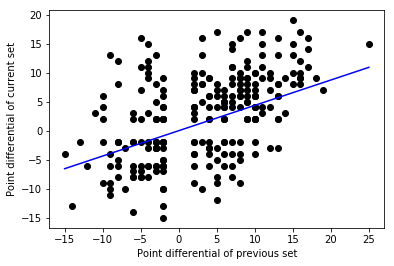

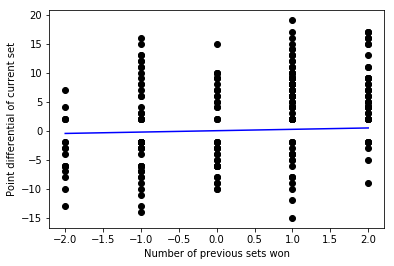

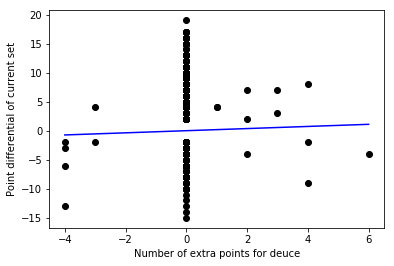

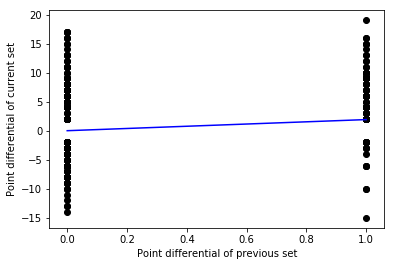

In [49]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

scoreboard = np.genfromtxt('scores.csv', delimiter=',')

scoreboard = scoreboard[1:,:]

num_games = scoreboard.shape[0]

num_features = 4

X = np.zeros((num_games*4, num_features))

y = np.zeros((num_games*4, 1))

record_index = 0

for game_index in range(num_games):
    game = scoreboard[game_index, :] # grab a game
    swat_win = 1 if game[2] > 0 else 0
    oppo_win = 1 - swat_win
    home = game[-1]
    set_index = 1
    deuce = 0
    while set_index < 5 and swat_win < 3 and oppo_win < 3: # while game did not end
        prev_point_dif = game[(set_index-1)*3+2]
        prev_swat_score = game[(set_index-1)*3]
        prev_opponent_score = game[(set_index-1)*3+1]
        if (prev_swat_score > 25):
            deuce = (prev_swat_score - 25) if prev_swat_score > prev_opponent_score else -1*(prev_opponent_score - 25)
        else:
            deuce = 0
        cur_point_dif = game[set_index*3+2]
        X[record_index] = [prev_point_dif, swat_win-oppo_win, deuce, home]
        y[record_index] = [cur_point_dif]
        record_index += 1
        if cur_point_dif > 0:
            swat_win += 1
        else:
            oppo_win += 1
        set_index += 1

X = X[:record_index, :]

y = y[:record_index, :]

reg = LinearRegression().fit(X, y)
print( "The adjusted R-squared coefficient is %f" % reg.score(X,y) )
print( "The estimated beta coefficients are:" )
print(reg.coef_)
print( "The estimated beta intercept is: ")
print(reg.intercept_)

min_x = np.amin(X[:,0])
max_x = np.amax(X[:,0])
x_pred = np.linspace(min_x,max_x)
y_pred = np.dot(reg.coef_[0,0],x_pred)
plt.scatter(X[:,0], y, color='black')
plt.plot(x_pred, y_pred, color='blue')
plt.xlabel("Point differential of previous set")
plt.ylabel("Point differential of current set")
plt.show()

min_x = np.amin(X[:,1])
max_x = np.amax(X[:,1])
x_pred = np.linspace(min_x,max_x)
y_pred = np.dot(reg.coef_[0,1],x_pred)
plt.scatter(X[:,1], y, color='black')
plt.plot(x_pred, y_pred, color='blue')
plt.xlabel("Number of previous sets won")
plt.ylabel("Point differential of current set")
plt.show()

min_x = np.amin(X[:,2])
max_x = np.amax(X[:,2])
x_pred = np.linspace(min_x,max_x)
y_pred = np.dot(reg.coef_[0,2],x_pred)
plt.scatter(X[:,2], y, color='black')
plt.plot(x_pred, y_pred, color='blue')
plt.xlabel("Number of extra points for deuce")
plt.ylabel("Point differential of current set")
plt.show()

min_x = np.amin(X[:,3])
max_x = np.amax(X[:,3])
x_pred = np.linspace(min_x,max_x)
y_pred = np.dot(reg.coef_[0,3],x_pred)
plt.scatter(X[:,3], y, color='black')
plt.plot(x_pred, y_pred, color='blue')
plt.xlabel("Home or Away")
plt.ylabel("Point differential of current set")
plt.show()